1.0 Import Modules and View data to be modeled

2.0 Linear Regression

3.0 K mean clustering

4.0 Decission Tree

5.0 Time Series Aggression Analysis



In [1]:
#Task 1.0

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error



warnings.filterwarnings('ignore')

In [2]:
#Task 1.1
#In prior EDA submission, I used price column to spit the data evenly into 80/20

xTrainModel=pd.read_csv(r'.\Data\UsedCarData\X_Train_Output.csv',header=0)
xTestModel=pd.read_csv(r'.\Data\UsedCarData\X_Test_Output.csv',header=0)
yTrainModel=pd.read_csv(r'.\Data\UsedCarData\y_Train_Output.csv',header=0)
yTestModel=pd.read_csv(r'.\Data\UsedCarData\y_Test_Output.csv',header=0)
usedvehicle=pd.read_csv(r'.\Data\UsedCarData\clean_vehicles.csv', header=0 )

In [3]:
#Task 1.2.0
xTrainModel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97412 entries, 0 to 97411
Columns: 104 entries, year to paint_color_yellow
dtypes: float64(104)
memory usage: 77.3 MB


In [4]:
#Task 1.2.1
xTrainModel.head()

,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_unknown,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,transmission_unknown,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,-0.573189,0.664925,0.418292,1.086798,-0.101225,-0.019755,-0.007165,-0.102868,-0.163293,-0.113132,-0.117609,-0.415409,-0.130696,-0.01433,-0.18831,-0.013212,-0.037115,-0.460172,-0.204656,-0.017552,-0.239705,-0.146911,-0.109493,-0.055766,-0.22781,-0.130656,-0.009063,-0.134148,-0.097484,-0.106328,-0.155921,-0.064132,-0.066587,-0.084524,-0.230687,-0.088675,-0.054738,-0.186137,-0.060819,-0.060819,-0.150195,-0.018128,3.325272,-0.212798,-0.140587,-0.084215,1.113379,-0.187901,-0.821626,-0.348711,-0.073258,-0.051332,-0.08996,-0.027385,-0.047032,-0.668709,-0.09259,1.315063,-0.657750,-0.056227,-0.262554,-0.041316,0.318136,-0.107066,-0.120798,0.238361,-0.088144,-0.048649,-0.023984,-0.175541,-0.115756,0.459369,-0.290045,-0.326904,-0.010132,1.19272,-0.713967,-0.576702,1.908514,-0.042302,-0.171334,-0.272686,-0.193537,-0.148363,-0.061412,-0.161328,-0.331692,-0.570696,-0.386791,-0.278593,-0.166902,-0.157673,2.094360,-0.347914,-0.169676,-0.149945,-0.186225,-0.341314,-0.082151,-0.057229,-0.348359,-0.407837,-0.574980,-0.096784
1,0.482503,0.469230,-0.915502,0.314101,-0.101225,-0.019755,-0.007165,-0.102868,-0.163293,-0.113132,-0.117609,-0.415409,-0.130696,-0.01433,-0.18831,-0.013212,-0.037115,-0.460172,4.886244,-0.017552,-0.239705,-0.146911,-0.109493,-0.055766,-0.22781,-0.130656,-0.009063,-0.134148,-0.097484,-0.106328,-0.155921,-0.064132,-0.066587,-0.084524,-0.230687,-0.088675,-0.054738,-0.186137,-0.060819,-0.060819,-0.150195,-0.018128,-0.300727,-0.212798,-0.140587,-0.084215,1.113379,-0.187901,-0.821626,-0.348711,-0.073258,-0.051332,-0.08996,-0.027385,-0.047032,-0.668709,-0.09259,-0.760420,1.520335,-0.056227,-0.262554,-0.041316,0.318136,-0.107066,-0.120798,0.238361,-0.088144,-0.048649,-0.023984,-0.175541,-0.115756,0.459369,-0.290045,-0.326904,-0.010132,1.19272,-0.713967,-0.576702,-0.523968,-0.042302,-0.171334,-0.272686,-0.193537,-0.148363,-0.061412,-0.161328,-0.331692,-0.570696,2.585373,-0.278593,-0.166902,-0.157673,2.094360,-0.347914,-0.169676,-0.149945,-0.186225,-0.341314,-0.082151,-0.057229,-0.348359,-0.407837,-0.574980,-0.096784
2,0.194587,0.354234,0.858227,0.825056,-0.101225,-0.019755,-0.007165,-0.102868,-0.163293,-0.113132,-0.117609,-0.415

In [5]:
#Task 1.2.2
yTrainModel.head()

,price
0,9.259226
1,10.307318
2,10.668862
3,10.542733
4,8.682877


In [6]:
yTrainModel

,price
0,9.259226
1,10.307318
2,10.668862
3,10.542733
4,8.682877
...,...
97407,7.673688
97408,10.081676
97409,8.412055
97410,8.497195


In [7]:
#Task 1.2.3
xTestModel.head()

,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_unknown,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,transmission_unknown,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,0.290559,0.157638,-0.997091,-0.259257,-0.101225,-0.019755,-0.007165,-0.102868,-0.163293,-0.113132,-0.117609,-0.415409,-0.130696,-0.01433,-0.18831,-0.013212,-0.037115,2.173103,-0.204656,-0.017552,-0.239705,-0.146911,-0.109493,-0.055766,-0.22781,-0.130656,-0.009063,-0.134148,-0.097484,-0.106328,-0.155921,-0.064132,-0.066587,-0.084524,-0.230687,-0.088675,-0.054738,-0.186137,-0.060819,-0.060819,-0.150195,-0.018128,-0.300727,-0.212798,-0.140587,-0.084215,-0.898166,-0.187901,1.217098,-0.348711,-0.073258,-0.051332,-0.08996,-0.027385,-0.047032,1.495419,-0.09259,-0.760420,-0.657750,-0.056227,-0.262554,-0.041316,0.318136,-0.107066,-0.120798,0.238361,-0.088144,-0.048649,-0.023984,-0.175541,-0.115756,0.459369,-0.290045,-0.326904,-0.010132,-0.83842,1.400625,-0.576702,-0.523968,-0.042302,-0.171334,-0.272686,-0.193537,-0.148363,-0.061412,-0.161328,-0.331692,1.752246,-0.386791,-0.278593,-0.166902,-0.157673,-0.477473,-0.347914,-0.169676,-0.149945,-0.186225,-0.341314,-0.082151,-0.057229,-0.348359,-0.407837,1.739192,-0.096784
1,-0.285273,0.661724,-1.582191,-0.168241,-0.101225,-0.019755,-0.007165,-0.102868,-0.163293,-0.113132,-0.117609,-0.415409,-0.130696,-0.01433,-0.18831,-0.013212,-0.037115,-0.460172,-0.204656,-0.017552,-0.239705,6.806859,-0.109493,-0.055766,-0.22781,-0.130656,-0.009063,-0.134148,-0.097484,-0.106328,-0.155921,-0.064132,-0.066587,-0.084524,-0.230687,-0.088675,-0.054738,-0.186137,-0.060819,-0.060819,-0.150195,-0.018128,-0.300727,-0.212798,-0.140587,-0.084215,-0.898166,5.321964,-0.821626,-0.348711,-0.073258,-0.051332,-0.08996,-0.027385,-0.047032,1.495419,-0.09259,-0.760420,-0.657750,-0.056227,-0.262554,-0.041316,0.318136,-0.107066,-0.120798,0.238361,-0.088144,-0.048649,-0.023984,-0.175541,-0.115756,-2.176900,3.447737,-0.326904,-0.010132,-0.83842,1.400625,-0.576702,-0.523968,-0.042302,-0.171334,3.667224,-0.193537,-0.148363,-0.061412,-0.161328,-0.331692,-0.570696,-0.386791,-0.278593,-0.166902,-0.157673,-0.477473,-0.347914,-0.169676,-0.149945,-0.186225,-0.341314,-0.082151,-0.057229,-0.348359,2.451957,-0.574980,-0.096784
2,0.194587,0.139725,-0.531630,-0.310340,-0.101225,-0.019755,-0.007165,-0.102868,-0.163293,-0.113132,-0.117609,2

In [8]:
#Task 1.2.4
yTestModel.head()

,price
0,8.853523
1,6.311735
2,7.313887
3,0.000000
4,0.000000


In [9]:
#Task 1.3.1
xTrainModel.shape

(97412, 104)

In [10]:
#Task 1.3.2
yTrainModel.shape

(97412, 1)

In [11]:
#Task 1.3.3
xTestModel.shape

(32471, 104)

In [12]:
#Task 1.3.4
yTestModel.shape

(32471, 1)

# Task 2.0

Linear Regression   

In [13]:
# Task 2.1

# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel = linear_model.LinearRegression(normalize=True)


In [14]:
# Task 2.2

# We now want to train the model on our test data.
rModel.fit(xTrainModel,yTrainModel)


LinearRegression(normalize=True)

In [15]:
# Task 2.3

# Evaluate the model  
print(rModel.score(xTrainModel,yTrainModel))

0.09022797359191126


In [16]:
# Task 2.4

# Use the model to make predictions about our test data
y_pred = rModel.predict(xTestModel)
y_pred

array([[8.29751953],
       [7.43819794],
       [8.31063446],
       ...,
       [9.0641211 ],
       [8.76644501],
       [8.67928681]])

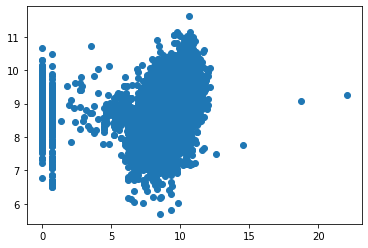

In [17]:
# Task 2.5

# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(yTestModel,y_pred)

In [18]:
# Task 2.6

#r2 or mean square error report or root mean square
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


#test Train data


In [19]:
# Task 2.7

#test data



# Put the predictions & actual values into a dataframe
matches = pd.DataFrame(yTestModel)
matches.rename(columns={'price':'actual'},inplace=True)
matches["predictions"]=y_pred

rmse(matches["actual"],matches['predictions'])


2.050783794605163

# Task 3.0

Random Forest Regressor


In [20]:
#reimport yTestModel
yTestModel=pd.read_csv(r'.\Data\UsedCarData\y_Test_Output.csv',header=0)

In [21]:
#Task 3.1

RandomForestRegModel = RandomForestRegressor()
RandomForestRegModel.fit(xTrainModel,yTrainModel)

KeyboardInterrupt: 

In [ ]:
#Task 3.2

y_pred2 = RandomForestRegModel.predict(xTestModel)
y_pred2

In [ ]:
#Task 3.3

mse2 = mean_squared_error(yTestModel, y_pred2)
mse2

In [ ]:
rsme2= np.sqrt(mse2)
rsme2

# Task 4.0

Support Vector Regression

https://heartbeat.fritz.ai/support-vector-regression-in-python-using-scikit-learn-89cc18e933b7


In [ ]:
# Task 4.1

SupportVectorRegModel=SVR()
SupportVectorRegModel.fit(xTrainModel,yTrainModel)

In [ ]:
# Task 4.2

y_pred3 = SupportVectorRegModel.predict(xTestModel)
y_pred3

In [ ]:
# Task 4.3

mse3 = mean_squared_error(yTestModel, y_pred3)
mse3

In [ ]:
# Task 4.4

rmse=np.sqrt(mse3)
rmse

used on of the r2 or mean square error